In [10]:
from mindinfer import Model, preproc,multiclass_nms, demo_postprocess,vis
from mindspore import load_checkpoint, load_param_into_net, context, Tensor
import cv2
import numpy as np
import matplotlib.pyplot as plt
context.set_context(mode=context.GRAPH_MODE, device_target="CPU")

In [11]:
model = Model()
param_dict = load_checkpoint("yolox_s.ckpt")
not_load_params = load_param_into_net(model, param_dict)

In [20]:
image_path = 'datasets/data_train/91.jpg'
origin_img = cv2.imread(image_path)
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)
input_shape = (640,640)
img, ratio = preproc(origin_img, input_shape, mean, std)
img = img.reshape(1,3,640,640)

In [21]:
intput_img = Tensor(img)
output = model(intput_img).asnumpy()
predictions = demo_postprocess(output[0], input_shape, p6=False)

In [22]:
boxes = predictions[:, :4]
scores = predictions[:, 4:5] * predictions[:, 5:]

boxes_xyxy = np.ones_like(boxes)
boxes_xyxy[:, 0] = boxes[:, 0] - boxes[:, 2]/2.
boxes_xyxy[:, 1] = boxes[:, 1] - boxes[:, 3]/2.
boxes_xyxy[:, 2] = boxes[:, 0] + boxes[:, 2]/2.
boxes_xyxy[:, 3] = boxes[:, 1] + boxes[:, 3]/2.
boxes_xyxy /= ratio
dets = multiclass_nms(boxes_xyxy, scores, nms_thr=0.45, score_thr=0.1)
if dets is not None:
    final_boxes, final_scores, final_cls_inds = dets[:, :4], dets[:, 4], dets[:, 5]
    origin_img = vis(origin_img, final_boxes, final_scores, final_cls_inds,
                        conf=0.1, class_names=("green_go", "pedestrian_crossing", "red_stop", "speed_limited", "speed_unlimited", "yellow_back"))

In [27]:
final_scores.shape

(2,)

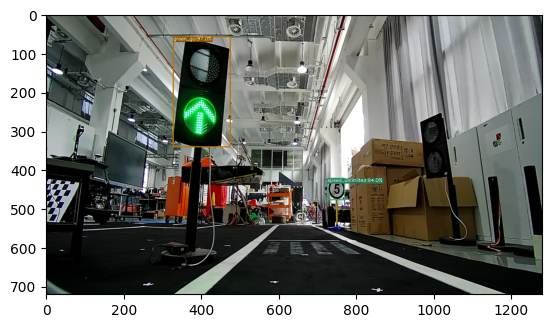

In [26]:
plt.imshow(origin_img[:,:,::-1])
plt.show()

In [31]:
final_boxes[0]

array([328.45013428,  58.86862183, 475.08294678, 341.38235474])

In [30]:
final_cls_inds.shape[0]

2